# Inleiding

De SymPy bibliotheek van Python is een krachtige tool om op een gestructureerde wijze “lastig” en “vervelend” rekenwerk te verrichten. Python inclusief SymPy is open-source beschikbaar. Je kunt deze software downloaden via Anaconda.

Om het gebruik van de SymPy bibliotheek van NumPy te demonstreren worden hier een aantal voorbeelden uitgewerkt. De onderdelen die aan de orde komen zijn:
De onderdelen die aan de orde komen zijn:

- Voorbeeld 1
- Voorbeeld 2
- Voorbeeld 3 : het werken met vergelijkingen
- Voorbeeld 4 : het oplossen van een differentiaalvergelijking
- Voorbeeld 5 : werken  met matrices

De eerste vier voorbeelden hebben betrekking op statisch onbepaalde constructies. Verschillende oplosmethodieken worden met deze voorbeelden gedemonstreerd.

In voorbeeld 1 wordt gebruik gemaakt van de zakkingslijn voor buiging. Hiervoor worden met behulp van randvoorwaarden en overgangsvoorwaarden acht vergelijkingen opgesteld waarmee het zakkingsveld voor dit voorbeeld kan worden bepaald. 

In voorbeeld 2 en 3 wordt met behulp van de krachtenmethode op basis van hoekveranderingsvergelijkingen de krachtsverdelingen bepaald voor twee statisch onbepaalde constructies. Ook hier worden de vergelijkingen opgesteld waarmee de onbekenden kunnen worden opgelost. 

In voorbeeld 4 wordt hetzelfde probleem als in voorbeeld 1 in Python direct opgelost door gebruik te maken van de oplossingsmethodieken voor differentiaalvergelijkingen. 

In voorbeeld 5 wordt aan de hand van een voorbeeld uit de statica een stelsel vergelijkingen opgesteld dat in matrixvorm kan worden weergegeven. Voor het oplossen van de onbekenden wordt vervolgens gebruik gemaakt van de lineaire algebra technieken die in Python voorhanden zijn.



## Voorbeeld 1 : Vergelijkingen oplossen

Het voorbeeld betreft de in figuur 1 weergegeven constructie. De ligger AB wordt belast met een gelijkmatig verdeelde belasting die alleen aangrijpt aan op het liggerdeel AC. De ligger is in B volledig ingeklemd. Op de ligger werkt een gelijkmatig verdeelde belasting die alleen aangrijpt op liggerdeel AC. De oorsprong van het assenstel x-z-assenstelsel wordt in A gekozen.

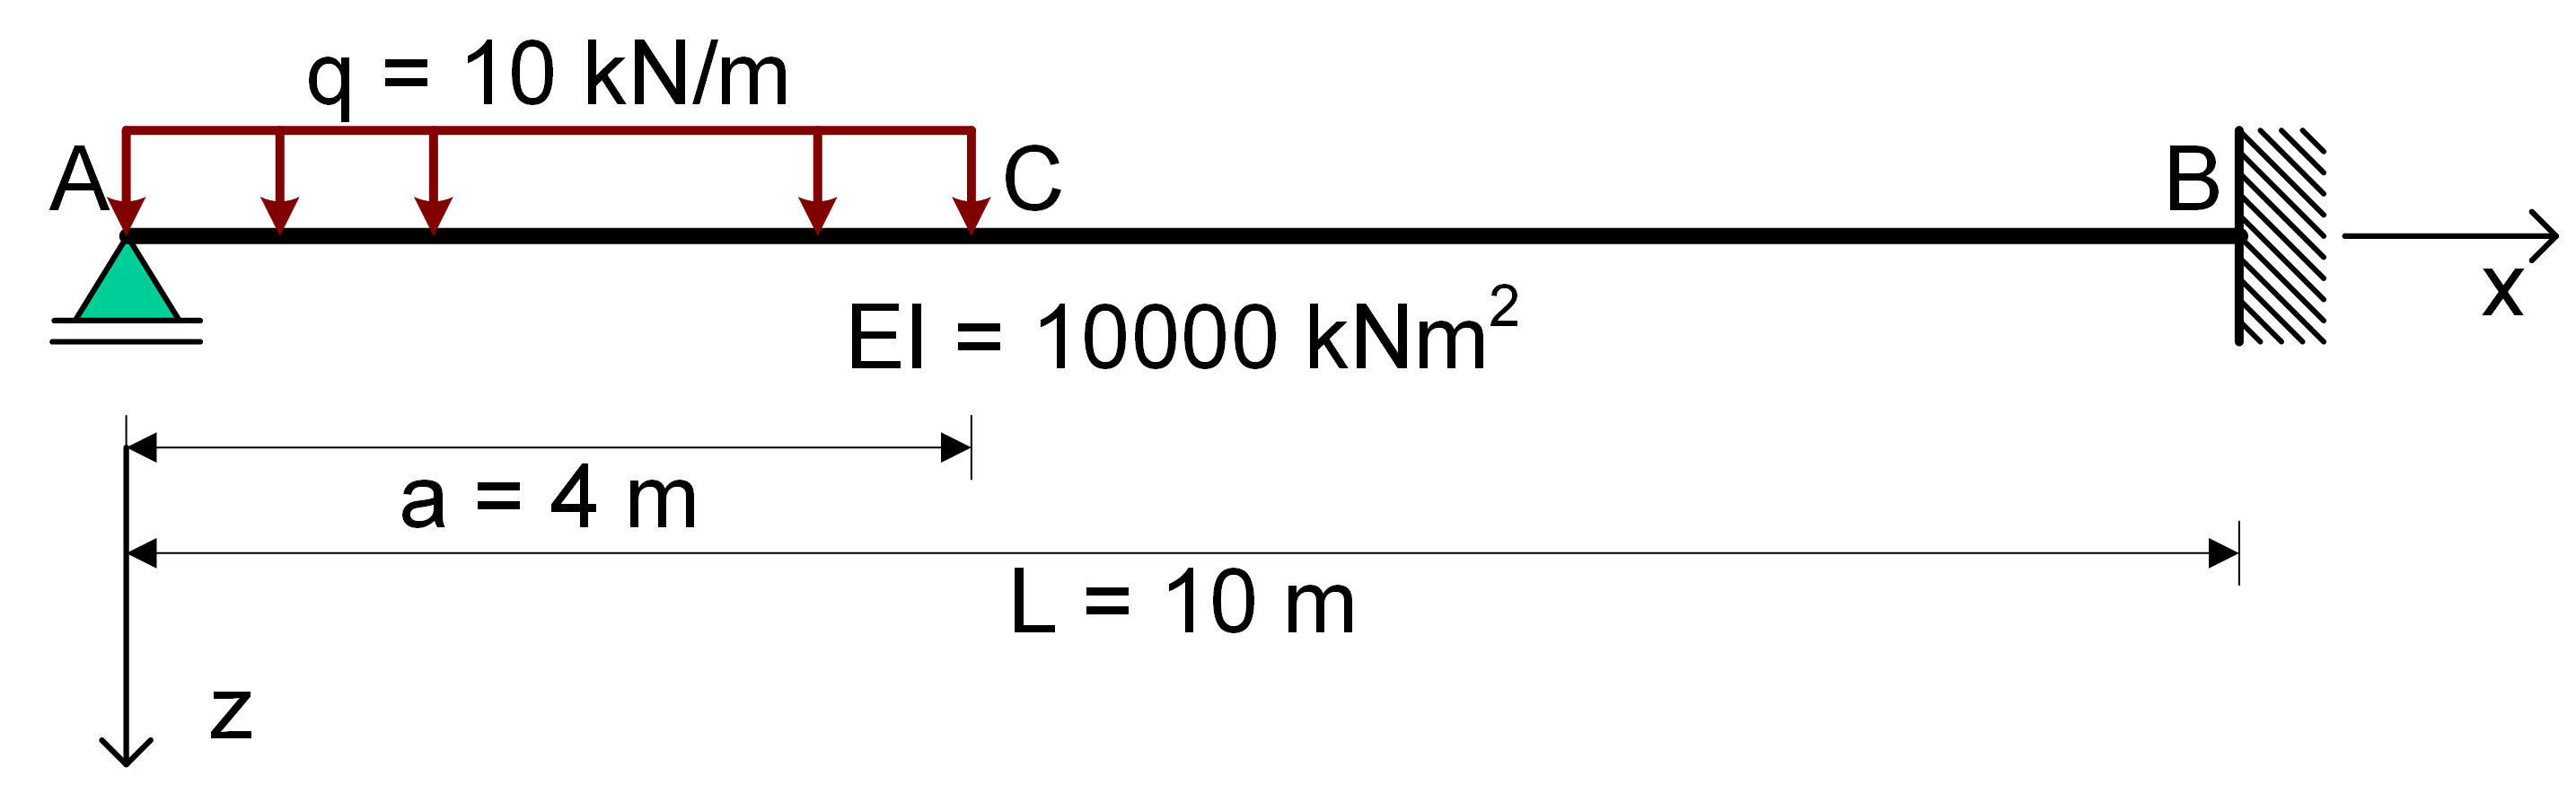

Omdat de belasting niet met één functievoorschrift voor de gehele ligger kan worden beschreven moeten de liggerdelen (velden) AC en CB afzonderlijk worden bekeken . Voor elk veld geldt de 4e orde differentiaalvergelijking voor buiging:
	 
$EI{{{{\rm{d}}^4}w} \over {{\rm{d}}{x^4}}} = q(x)$

Om de grootheden $w$, $\phi$, $M$ en $V$ in de velden AC en CB van elkaar te kunnen onderscheiden krijgen ze in veld AC een index 1 en in veld CB een index 2, dus:

- voor liggerdeel AC: $w_1$, $\phi_1$, etc.
- voor liggerdeel CB: $w_{2}$, etc.

De algemene oplossing van de 4e orde D.V. voor buiging in het geval van een gelijkmatig verdeelde belasting $q(x)=q$ is:
$$w(x) = \underbrace {{C_1} + {C_2}x + {C_3}{x^2} + {C_4}{x^3}}_{{\rm{homogene\space oplossing}}} + \underbrace {{{q{x^4}} \over {24EI}}}_{{\rm{particuliere\space oplossing}}}$$

Per liggerdeel kan het verplaatsingsveld worden opgesteld. Aangezien de gelijkmatig verdeelde belasting nul is op het liggerdeel BC is de particuliere oplossing voor dit deel van de ligger gelijk aan nul. Er geldt:

${w_{\rm{I}}}(x) = {C_1} + {C_2}x + {C_3}{x^2} + {C_4}{x^3} + {{q{x^4}} \over {24EI}}$

${w_{{\rm{2}}}}(x) = {C_5} + {C_6}x + {C_7}{x^2} + {C_8}{x^3}$
  
In totaal zijn er 8 onbekende integratieconstanten: $C_1$ t/m $C_4$ (veld AC) en $C_5$ t/m $C_8$ (veld CB). Deze zijn te berekenen met behulp van de rand- en overgangsvoorwaarden.

Ter plaatse van de randen A en B gelden (per rand) twee randvoorwaarden. Ter plaatse van de veldovergang in C moeten vier overgangsvoorwaarden worden opgesteld. De rand en overgangsvoorwaarden zijn:
- $w_1(0) = 0$
- $M_1(0) = 0$
- $w_1(a) = w_2(a)$
- $\phi_1(a) = \phi_2(a)$
- $M_1(a) = M_2(a)$
- $V_2(a) = V_2(a)$
- $w_2(L) = 0$
- $\phi)2(L) = 0$

Bij het uitwerken van de rand- en overgangsvoorwaarden wordt gebruik gemaakt van de volgende betrekkingen:

- $\phi_1(x) = - {{dw_1}\over {dx}}$
- $M_1(x) = - EI {{d^2w_1}\over {dx^2}}$
- $V_1(x) = {{dM_1}\over {dx}}$
- $\phi_2(x) = - {{dw_2}\over {dx}}$
- $M_2(x) = - EI {{d^2w_2}\over {dx^2}}$
- $V_2(x) = {{dM_2}\over {dx}}$

### Uitwerking in Python
In Python kan gewoon met symbolen worden gewerkt. Het is dus niet nodig om alle vergelijkingen eerst met de hand uit te werken. De betrekkingen uit kunnen direct worden overgenomen in Python. De genummerde tekst in het grijze kader is de in te typen tekst, daaronder is het eventuele resultaat van Python weergegeven. 

Ten eerste moet de SymPy bibliotheek worden geïmporteerd


In [1]:
import sympy as sp

Vervolgens moeten alle symbolen die gebruikt gaan worden gedefinieerd. Let op, bij de symbolen $w_1$ en $w_2$ moet aangegeven worden dat het om een functie gaat.

In [2]:
C1, C2, C3, C4, C5, C6, C7, C8 = sp.symbols('C1 C2 C3 C4 C5 C6 C7 C8')
x = sp.symbols('x')

Vervolgens kunnen de variabelen worden gedeclareerd. Dit zijn voor dit voorbeeld de afmetingen $a$ en $L$, de belasting $q$ en de buigstijfheid $EI$. Let erop dat alle grootheden in dezelfde eenheden worden ingevoerd. In dit voorbeeld dus $kN$ en $m$.

In [5]:
a = 4
L = 10
q = 10
EI = 10000

Vervolgens worden de verplaatsingsfuncties voor de beide liggerdelen ingevoerd:

In [6]:
w1 = C1 + C2*x + C3*x**2 + C4*x**3 + 1/(24*EI)*q*x**4
w2 = C5 + C6*x + C7*x**2 + C8*x**3

Deze verplaatsingsfuncties kunnen ook worden gevonden door Python. Daarvoor moet eerst de differentiaalvergelijkingen worden gespecificeerd met het `sp.diff` commando. Voor de punt moet aangegeven worden welke functie gedifferentieerd moet worden en tussen haakjes de naar welke variabele en tot welke orde moet worden gedifferentieerd.

In [11]:
w1, w2 = sp.symbols('w1 w2', cls=sp.Function)
diffeq1 = sp.Eq(EI*sp.diff(w1(x), x, 4),q)
diffeq2 = sp.Eq(EI*sp.diff(w2(x), x, 4),0)

De verplaatsingsfunctie kan dan geworden worden met behulp van het commando `sp.dsolve`, waarbij beide differentiaalvergelijkingen gelijktijdig moeten worden opgelost. Vervolgens kan met het commando `.rhs` enkel het relevante rechter gedeelte van de oplossing genomen.

In [12]:
w1,w2 = sp.dsolve([diffeq1, diffeq2], [w1(x), w2(x)])
w1 = w1.rhs
w2 = w2.rhs

Voor het verwerken van de randvoorwaarden en overgangsvoorwaarden worden de betrekkingen ingevoerd.

In [17]:
phi1   = -sp.diff(  w1, x)
kappa1 =  sp.diff(phi1, x)
M1     = EI * kappa1
V1     =  sp.diff(  M1, x)
phi2   = -sp.diff(  w2, x)
kappa2 =  sp.diff(phi2, x)
M2     = EI * kappa2
V2     =  sp.diff(  M2, x)

Voor de verdere uitwerking van het probleem moeten nu de 8 vergelijkingen worden ingevoerd. In Python kunnen vergelijkingen expliciet worden vermeld. Er hoeft dus niets met de hand uitgeschreven of vereenvoudigd te worden. Je kunt zelf een naam verzinnen voor iedere vergelijking. In dit voorbeeld wordt gebruik gemaakt van de afkorting `Eq1`, `Eq2` etc.

De rand- en overgangsvoorwaarden gelden voor drie verschillende plaatsen in de ligger :


#### Randvoorwaarden in A  $(x=0)$
Bij de twee randvoorwaarden in A moet x de waarde nul krijgen. Uitwerken levert:


In [16]:
Eq1 = sp.Eq(w1.subs(x, 0) ,0)
Eq2 = sp.Eq(M1.subs(x, 0) ,0)

#### Overgangsvoorwaarden in C $( x=a )$
De vier overgangsvoorwaarden worden als volgt ingevoerd:


In [15]:
Eq3 = sp.Eq( w1.subs(x, a) ,  w2.subs(x, a))
Eq4 = sp.Eq( M1.subs(x, a) ,  M2.subs(x, a))
Eq5 = sp.Eq( V1.subs(x, a) ,  V2.subs(x, a))
Eq6 = sp.Eq(phi1.subs(x, a), phi2.subs(x, a))

#### Randvoorwaarden in B $( x=l )$
De twee randvoorwaarden in B leiden tot:

In [14]:
Eq7 = sp.Eq(w2.subs(x, L) , 0)
Eq8 = sp.Eq(phi2.subs(x, L) , 0)

Alle informatie is nu ingevoerd. De 8 vergelijkingen met 8 onbekenden moeten nu alleen nog worden opgelost. Hiervoor beschikt Python over een “solver” die wordt aangeroepen met `sp.solve`. De oplossing wordt eerst opgeslagen in een variabele waarvan de naam vrij mag worden gekozen. In dit geval wordt de naam sol gebruikt.

In [18]:
sol = sp.solve((Eq1, Eq2, Eq3, Eq4, Eq5, Eq6, Eq7, Eq8),
               ( C1 , C2,  C3,  C4,  C5,  C6,  C7,  C8))

Vervolgens wordt met het commando `.subs` de oplossing gesubstitueerd in de verplaatsingfuncties.

In [19]:
w1_sol = w1.subs(sol)
w2_sol = w2.subs(sol)

Het probleem is nu opgelost. De gevonden verplaatsingvelden kunnen netjes worden weergegeven met `display`:

In [20]:
display(w1_sol)
display(w2_sol)

x**4/24000 - 59*x**3/125000 + 41*x/3750

73*x**3/375000 - x**2/250 + 27*x/1250 - 4/375

Dit resultaat kan ook grafisch worden weergegeven. Daarvoor kunnen de (bekend veronderstelde) functies van NumPy en Matplotlib gebruikt worden. Met `sp.lambidfy` kan een SymPy uitdrukking geschreven worden als een NumPy functie.

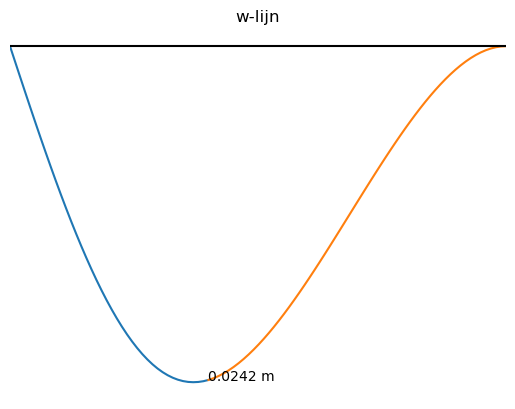

In [22]:
import numpy as np
import matplotlib.pyplot as plt
x1_plot = np.linspace(0 , 4 , 40)
x2_plot = np.linspace(4 , 10 , 60)
w1_numpy = sp.lambdify(x , w1_sol)
w2_numpy = sp.lambdify(x , w2_sol)
w1_plot = w1_numpy(x1_plot)
w2_plot = w2_numpy(x2_plot)
plt.plot(x1_plot,w1_plot)
plt.plot(x2_plot,w2_plot)
plt.gca().invert_yaxis()
plt.title("w-lijn")
plt.axhline(0 , color='black')
plt.xlim(0 , 10)
plt.annotate('%.4f m' % w1_numpy(4) , xy = [4 , w1_numpy(4)])
plt.axis('off');

Voorbeeld 1 met verplaatsingsfunctie uit differentiaalvergelijking

x**4/24000 - 59*x**3/125000 + 41*x/3750

73*x**3/375000 - x**2/250 + 27*x/1250 - 4/375

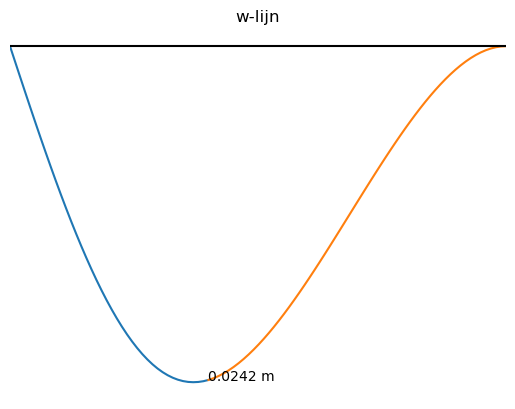

In [2]:
import sympy as sp
w1, w2 = sp.symbols('w1 w2', cls=sp.Function)
C1, C2, C3, C4, C5, C6, C7, C8 = sp.symbols('C1 C2 C3 C4 C5 C6 C7 C8')
x = sp.symbols('x')
a = 4
L = 10
q = 10
EI = 10000
diffeq1 = sp.Eq(EI*w1(x).diff(x,4),q)
diffeq2 = sp.Eq(EI*w2(x).diff(x,4),0)

phi1   = -sp.diff(w1 , x)
kappa1 =  sp.diff(phi1 , x)
M1     = EI * kappa1
V1     =  sp.diff(M1 , x)
phi2   = -sp.diff(w2 , x)
kappa2 =  sp.diff(phi2 , x)
M2     = EI * kappa2
V2     =  sp.diff(M2 , x)
Eq1 = sp.Eq(w1.subs(x , 0) , 0)
Eq2 = sp.Eq(M1.subs(x , 0) , 0)
Eq3 = sp.Eq(w1.subs(x , a),w2.subs(x , a))
Eq4 = sp.Eq(M1.subs(x , a),M2.subs(x , a))
Eq5 = sp.Eq(V1.subs(x , a) , V2.subs(x , a))
Eq6 = sp.Eq(phi1.subs(x , a) , phi2.subs(x , a))
Eq7 = sp.Eq(w2.subs(x , L) , 0)
Eq8 = sp.Eq(phi2.subs(x , L) , 0)
sol = sp.solve((Eq1 , Eq2 , Eq3 , Eq4 , Eq5 , Eq6 , Eq7 , Eq8),
               (C1 , C2 , C3 , C4 , C5 , C6 , C7 , C8))
w1_sol = w1.subs(sol)
w2_sol = w2.subs(sol)
display(w1_sol)
display(w2_sol)
import numpy as np
import matplotlib.pyplot as plt
x1_plot = np.linspace(0 , 4 , 40)
x2_plot = np.linspace(4 , 10 , 60)
w1_numpy = sp.lambdify(x , w1_sol)
w2_numpy = sp.lambdify(x , w2_sol)
w1_plot = w1_numpy(x1_plot)
w2_plot = w2_numpy(x2_plot)
plt.plot(x1_plot,w1_plot)
plt.plot(x2_plot,w2_plot)
plt.gca().invert_yaxis()
plt.title("w-lijn")
plt.axhline(0 , color='black')
plt.xlim(0 , 10)
plt.annotate('%.4f m' % w1_numpy(4) , xy = [4 , w1_numpy(4)])
plt.axis('off');

Voorbeeld 2

In [3]:
import sympy as sp
M_C, M_D = sp.symbols('M_C M_D')
F, H, L, EI, alpha, beta, theta, m, n = sp.symbols('F H L EI alpha beta theta m n')
Eq1 = sp.Eq(M_C*H/(3*n*EI) - theta + M_C*L/(3*EI) + beta*F*L**2/(16*EI) - M_D*L/(6*EI), 0)
Eq2 = sp.Eq(- M_C*L/(6*EI) - beta*F*L**2/(16*EI) + M_D*L/(3*EI) + M_D*H/(3*m*EI) - theta,0)
Eq3 = sp.Eq(alpha*F*H - M_C - M_D, 0)
sol = sp.solve((Eq1 , Eq2 , Eq3), (M_C , M_D , theta))
display( sp.collect(sol[M_C]   , [alpha*F*H, beta*F*L]))
display( sp.collect(sol[M_D]   , [alpha*F*H, beta*F*L]))
display( sp.collect(sol[theta] , [alpha*F*H, beta*F*L]))

(F*H*alpha*(8*H*n + 12*L*m*n) - 3*F*L**2*beta*m*n)/(8*H*m + 8*H*n + 24*L*m*n)

(F*H*alpha*(8*H*m + 12*L*m*n) + 3*F*L**2*beta*m*n)/(8*H*m + 8*H*n + 24*L*m*n)

(F*H*alpha*(16*H**2 + 16*H*L*m + 16*H*L*n + 12*L**2*m*n) + F*L*beta*(-3*H*L*m + 3*H*L*n))/(48*EI*H*m + 48*EI*H*n + 144*EI*L*m*n)

Voorbeeld 3

In [4]:
import sympy as sp
M_C, M_D = sp.symbols('M_C M_D')
F, K, H, L, EI, alpha, beta, theta, m, n, u = sp.symbols('F K H L EI alpha beta theta m n u')
Eq1 = sp.Eq(M_C*H/(3*n*EI) - theta +M_C*L/(3*EI) + beta*F*L**2/(16*EI) - M_D*L/(6*EI) + M_C/K, 0)
Eq2 = sp.Eq(- M_C*L/(6*EI) - beta*F*L**2/(16*EI) + M_D*L/(3*EI) + M_D*H/(3*n*EI) - theta + M_D/K, 0)
Eq3 = sp.Eq(alpha*F*H - M_C -M_D , 0)
sol = sp.solve((Eq1 , Eq2 , Eq3), (M_C , M_D , theta))
display(sp.collect(sol[M_C]  , alpha*F*H))
display(sp.collect(sol[M_D]  , alpha*F*H))
display(sp.collect(sol[theta], alpha*F*H))
u = sol[theta]*H
display(u)

(F*H*alpha*(24*EI*n + 8*H*K + 12*K*L*n) - 3*F*K*L**2*beta*n)/(48*EI*n + 16*H*K + 24*K*L*n)

(F*H*alpha*(24*EI*n + 8*H*K + 12*K*L*n) + 3*F*K*L**2*beta*n)/(48*EI*n + 16*H*K + 24*K*L*n)

F*H*alpha*(6*EI*n + 2*H*K + K*L*n)/(12*EI*K*n)

H*(6*EI*F*H*alpha*n + 2*F*H**2*K*alpha + F*H*K*L*alpha*n)/(12*EI*K*n)

Voorbeeld 4

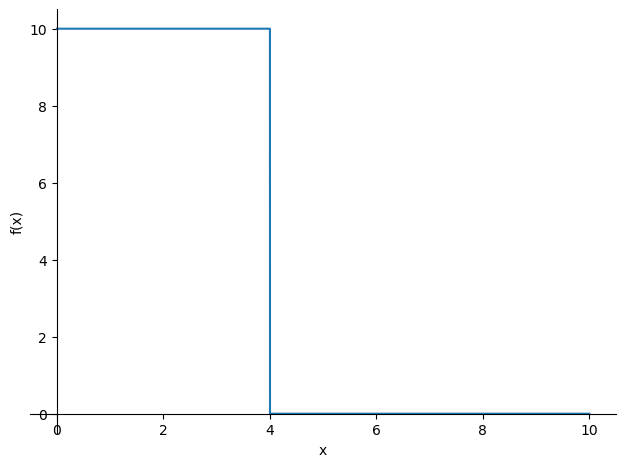

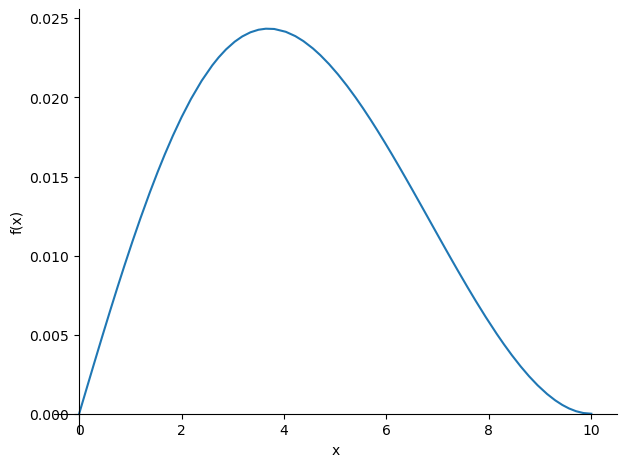

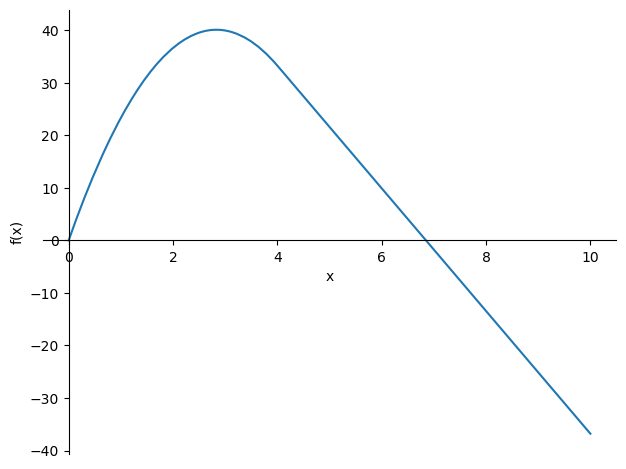

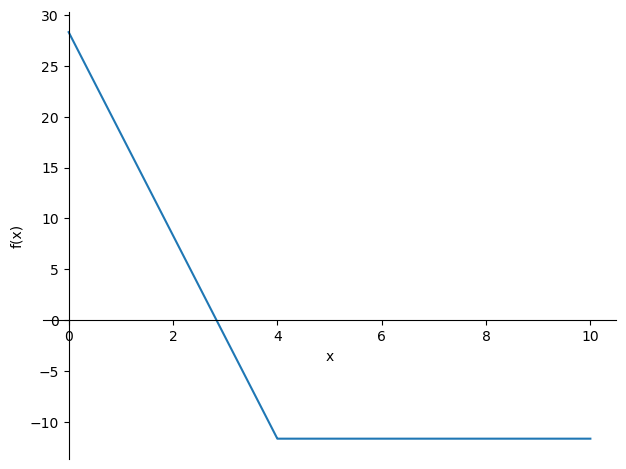

Eq(w(x), x**4*(3*Heaviside(x - 4) + 1)/24000 + x**3*(-Piecewise((0, Abs(x) < 4), (4*meijerg(((2, 1), ()), ((), (1, 0)), x/4), True))/6000 - 1729/750000 + meijerg(((1, 1), ()), ((), (1, 0)), 5/2)/3000 + meijerg(((2, 1), ()), ((), (1, 0)), 5/2)/1000) - x**2*Heaviside(x - 4)/250 + x*(4*Heaviside(x - 4)/375 - meijerg(((2, 1), ()), ((), (1, 0)), 5/2)/30 - meijerg(((1, 1), ()), ((), (1, 0)), 5/2)/30 + 707/7500) - 4*Heaviside(x - 4)/375)

In [5]:
import sympy as sp
w = sp.symbols('w', cls=sp.Function)
x = sp.symbols('x')
C1, C2, C3, C4 = sp.symbols('C1 C2 C3 C4') 
Q  = 10
L  = 10
EI = 10000
q = Q*(1 - sp.Heaviside(x - 4))
sp.plot(q , (x , 0 , 10))
diffeq = sp.Eq(EI*sp.diff(w(x) , x , 4) , q)
w = sp.dsolve(diffeq , w(x) , 
              ics={w(0): 0 ,
                   w(L): 0 ,
                   w(x).diff(x , 2).subs(x , 0) : 0 ,
                   w(x).diff(x , 1).subs(x , L) : 0})
w_sol = w.rhs
sp.plotting.plot(w_sol , (x , 0 , 10))
phi = -sp.diff(w_sol , x)
kappa = sp.diff(phi , x)
M = EI * kappa
V = sp.diff(M , x)
sp.plotting.plot(M , (x , 0 , 10));
sp.plotting.plot(V , (x , 0 , 10));
display(w)

Voorbeeld 4 zonder Heaviside

C1 + C2*x + C3*x**2/2 + C4*x**3/6 + x**4/24000

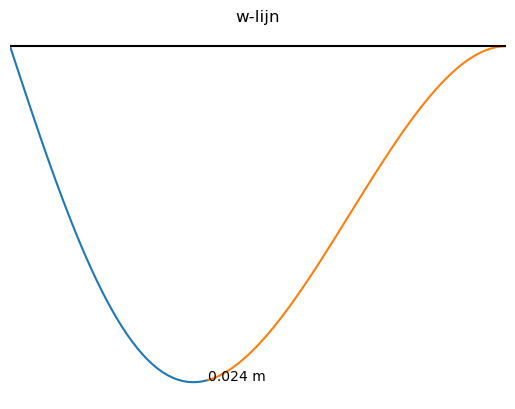

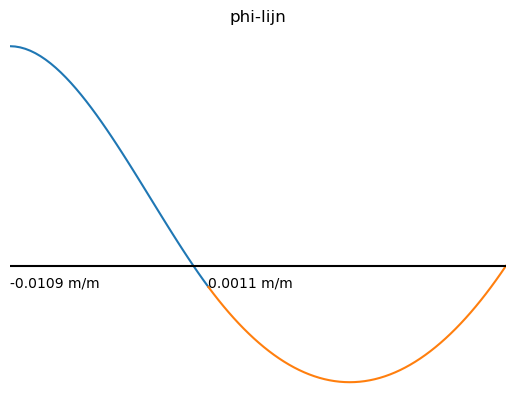

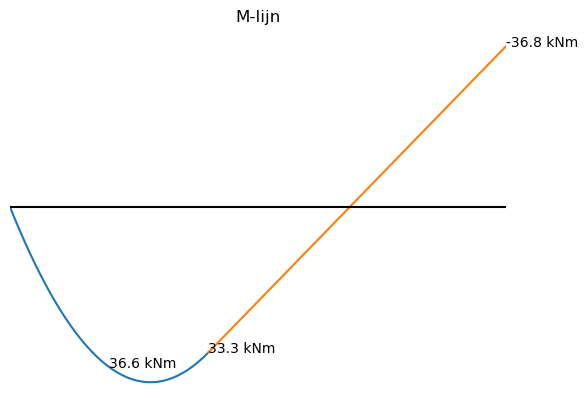

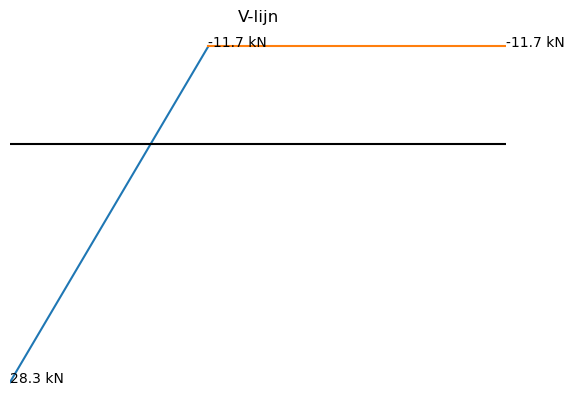

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

w1, w2 = sp.symbols('w1 w2', cls=sp.Function)
q1, q2 = sp.symbols('q1 q2')
a = 4
L = 10
q1 = 10
q2 = 0
EI = 10000
C1, C2, C3, C4, C5, C6, C7, C8 = sp.symbols('C1 C2 C3 C4 C5 C6 C7 C8')
x = sp.symbols('x')

diffeq1 = sp.Eq(EI*w1(x).diff(x,4),q1)
diffeq2 = sp.Eq(EI*w2(x).diff(x,4),q2)

w1,w2 = sp.dsolve([diffeq1,diffeq2],[w1(x),w2(x)])
w1 = w1.rhs
w2 = w2.rhs
display(w1)

phi1 = -sp.diff(w1,x)
kappa1 = sp.diff(phi1,x)
M1 = EI * kappa1
V1 = sp.diff(M1,x)
phi2 = -sp.diff(w2,x)
kappa2 = sp.diff(phi2,x)
M2 = EI * kappa2
V2 = sp.diff(M2,x)

Eq1 = sp.Eq(w1.subs(x,0),0)
Eq2 = sp.Eq(M1.subs(x,0),0)
Eq3 = sp.Eq(w1.subs(x,a),w2.subs(x,a))
Eq4 = sp.Eq(M1.subs(x,a),M2.subs(x,a))
Eq5 = sp.Eq(V1.subs(x,a),V2.subs(x,a))
Eq6 = sp.Eq(phi1.subs(x,a),phi2.subs(x,a))
Eq7 = sp.Eq(w2.subs(x,L),0)
Eq8 = sp.Eq(phi2.subs(x,L),0)

sol = sp.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8),(C1,C2,C3,C4,C5,C6,C7,C8))

w1_sol = w1.subs(sol)
w2_sol = w2.subs(sol)
x1_plot = np.linspace(0,4,40)
x2_plot = np.linspace(4,10,60)
w1_numpy = sp.lambdify(x,w1_sol)
w2_numpy = sp.lambdify(x,w2_sol)
w1_plot = w1_numpy(x1_plot)
w2_plot = w2_numpy(x2_plot)
plt.plot(x1_plot,w1_plot)
plt.plot(x2_plot,w2_plot)
plt.gca().invert_yaxis()
plt.title("w-lijn")
plt.axhline(0,color='black')
plt.xlim(0,10)
plt.annotate('%.3f m' % w1_numpy(4),xy = [4,w1_numpy(4)])
plt.axis('off');

phi1_sol = phi1.subs(sol)
phi2_sol = phi2.subs(sol)

phi1_numpy = sp.lambdify(x,phi1_sol)
phi2_numpy = sp.lambdify(x,phi2_sol)
phi1_plot = phi1_numpy(x1_plot)
phi2_plot = phi2_numpy(x2_plot)
plt.figure()
plt.plot(x1_plot,phi1_plot)
plt.plot(x2_plot,phi2_plot)
plt.gca().invert_yaxis()
plt.title("phi-lijn")
plt.axhline(0,color='black')
plt.xlim(0,10)
plt.annotate('%.4f m/m' % phi1_numpy(0),xy = [0,phi1_numpy(4)])
plt.annotate('%.4f m/m' % phi2_numpy(4),xy = [4,phi2_numpy(4)])
plt.axis('off');

M1_sol = M1.subs(sol)
M2_sol = M2.subs(sol)

M1_numpy = sp.lambdify(x,M1_sol)
M2_numpy = sp.lambdify(x,M2_sol)
M1_plot = M1_numpy(x1_plot)
M2_plot = M2_numpy(x2_plot)
plt.figure()
plt.plot(x1_plot,M1_plot)
plt.plot(x2_plot,M2_plot)
plt.gca().invert_yaxis()
plt.title("M-lijn")
plt.axhline(0,color='black')
plt.xlim(0,10)
plt.annotate('%.1f kNm' % M1_numpy(2),xy = [2,M1_numpy(2)])
plt.annotate('%.1f kNm' % M1_numpy(4),xy = [4,M1_numpy(4)])
plt.annotate('%.1f kNm' % M2_numpy(10),xy = [10,M2_numpy(10)])
plt.axis('off');

V1_sol = V1.subs(sol)
V2_sol = V2.subs(sol)

V1_numpy = sp.lambdify(x,V1_sol)
V2_numpy = sp.lambdify(x,V2_sol)
V1_plot = V1_numpy(x1_plot)
V2_plot = V2_numpy(x2_plot)
plt.figure()
plt.plot(x1_plot,V1_plot)
plt.plot([4,10],[V2_plot,V2_plot])
plt.gca().invert_yaxis()
plt.title("V-lijn")
plt.axhline(0,color='black')
plt.xlim(0,10) 
plt.annotate('%.1f kN' % V1_numpy(0),xy = [0,V1_numpy(0)])
plt.annotate('%.1f kN' % V1_numpy(4),xy = [4,V1_numpy(4)])
plt.annotate('%.1f kN' % V2_numpy(10),xy = [10,V2_numpy(10)])
plt.axis('off');

Voorbeeld 5

In [7]:
import numpy as np
G = 24
a = 1
A = np.array([[0 , 3/5   , 0  , 0      , 0  , 3/5 ] ,
              [1 , 4/5   , 1  , 4/5    , 1  , 4/5 ] ,
              [0 , 0     , 0  , 3/5    , 0  , 0   ] ,
              [a , 4/5*a , a  , 0      , 0  , 0   ] ,
              [0 , 3/5*a , 0  , -3/5*a , 0  , 0   ] ,
              [0 , 0     , -a , -4/5*a , -a , 0   ]])
b = np.array([0 , 0 , G , 0.5*G*a , -0.5*G*a , 0])
print(A)
print(b)
x = np.linalg.solve(A , b)
print(x)

[[ 0.   0.6  0.   0.   0.   0.6]
 [ 1.   0.8  1.   0.8  1.   0.8]
 [ 0.   0.   0.   0.6  0.   0. ]
 [ 1.   0.8  1.   0.   0.   0. ]
 [ 0.   0.6  0.  -0.6  0.   0. ]
 [ 0.   0.  -1.  -0.8 -1.   0. ]]
[  0.   0.  24.  12. -12.   0.]
[ 1.95399252e-15  2.00000000e+01 -4.00000000e+00  4.00000000e+01
 -2.80000000e+01 -2.00000000e+01]
